# Lets import the libraries required

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

## Resize all the image 

In [2]:
IMAGE_SIZE = [224, 224]

## We add the preprocessing layer in front of vgg

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

## We dont need to train the existing weights

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folder = glob('D:/horse-or-human/*')

In [6]:
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folder), activation='softmax')(x)

## Create a model object

In [7]:
model = Model(inputs=vgg.input, outputs=prediction)

## Structure of the model

In [8]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Compile the model

In [9]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [11]:

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/horse-or-human',
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/validation-horse-or-human',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
9/9 [==============================] - 233s 26s/step - loss: 5.6824 - accuracy: 0.5540 - val_loss: 0.2843 - val_accuracy: 0.9062
Epoch 2/5
9/9 [==============================] - 232s 26s/step - loss: 0.8267 - accuracy: 0.7945 - val_loss: 0.3181 - val_accuracy: 0.9336
Epoch 3/5
9/9 [==============================] - 237s 26s/step - loss: 0.2176 - accuracy: 0.9338 - val_loss: 0.1201 - val_accuracy: 0.9688
Epoch 4/5
9/9 [==============================] - 222s 25s/step - loss: 0.0684 - accuracy: 0.9737 - val_loss: 0.4403 - val_accuracy: 0.9180
Epoch 5/5
9/9 [==============================] - 227s 25s/step - loss: 0.0500 - accuracy: 0.9834 - val_loss: 0.3308 - val_accuracy: 0.9336


## Loss

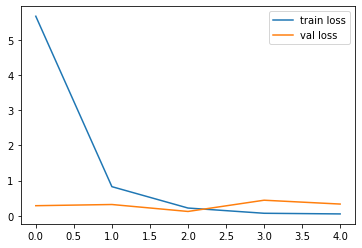

In [13]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

## Accuracy

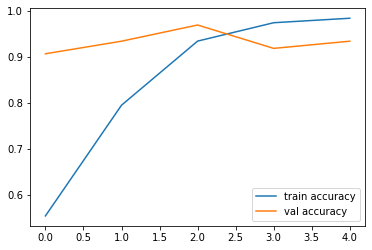

In [14]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [15]:
model.save('humanhorse.h5')